### Merge Sort, Max Sub Array, Count Inversions

1. This is actually post-order traversal.

In [110]:
def mergesort(a, l, h, level):
    
    p = (h + l)//2
    
    if l >= h:
        print(('\t' * (level)) + "Base:", end="")
        print(l, h, p)
        return
        
    print(('\t' * (level)) + "Left:", end="")
    print(l, p)
    
    mergesort(a, l, p, level+1)
    
    print(('\t' * (level)) + "Right:", end="")
    print(p+1, h)
    
    mergesort(a, p+1, h, level+1)
    
    print(('\t' * (level)) + "Parent:", end="")
    print(l, p, h)
    
    return

arr = [2, 5, 1, 7, 3, 9, 6, 4]
print("Merge", 0, len(arr)-1)
mergesort(arr, 0, len(arr)-1, 1)

Merge 0 7
	Left:0 3
		Left:0 1
			Left:0 0
				Base:0 0 0
			Right:1 1
				Base:1 1 1
			Parent:0 0 1
		Right:2 3
			Left:2 2
				Base:2 2 2
			Right:3 3
				Base:3 3 3
			Parent:2 2 3
		Parent:0 1 3
	Right:4 7
		Left:4 5
			Left:4 4
				Base:4 4 4
			Right:5 5
				Base:5 5 5
			Parent:4 4 5
		Right:6 7
			Left:6 6
				Base:6 6 6
			Right:7 7
				Base:7 7 7
			Parent:6 6 7
		Parent:4 5 7
	Parent:0 3 7


In [76]:
def mergesort(a, l, h, level):
    
    if l == h:
        print(('\t' * (level)) + "Base", l, h)
        return
    
    p = (h + l)//2
    
    print(('\t' * (level)) + "before:", end="")
    print("calling left", l, p)
    
    mergesort(a, l, p, level+1)
    print(('\t' * (level)) + "between:", end="")
    print(l, p, h)
    
    print("calling right", p+1, h)
    mergesort(a, p+1, h, level+1)
    
    print(('\t' * (level)) + "after:", end="")
    print(l, p, h)
    mergehelper(a, l, p, h, level)

def mergehelper(a, p, q, r, level):
    print(('\t' * (level)) + ":", end="")
    print("p,q,r", p,q,r)
    
    la = []
    for m in range(p, q+1): # for m = p; m < q+1
        la.append(a[m])
        
    ra = []
    for m in range(q+1, r+1): # for m = p; m < r+1
        ra.append(a[m])
    '''
    la = a[p:q+1] # starting from index p, copy until q    
    ra = a[q+1:r+1] # start from index q+1, copy until r    
    print(len(la), len(ra)) # if p=0,q=0,r=1 then la has 0th element and ra has 1st element
    '''
    print(('\t' * (level)) + ":", end="")
    print(la, ra)
    
    i = j = 0 
    k = p    
    
    while i < len(la) and j < len(ra):
        if la[i] < ra[j]:
            a[k] = la[i]
            i += 1
        else:
            a[k] = ra[j]
            j += 1
        k += 1
    
    while j < len(ra):
        a[k] = ra[j]
        j += 1
        k += 1
    
    while i < len(la):
        a[k] = la[i]
        i += 1
        k += 1
    print(a)
    
arr = [9,1,3, 2, 5, 7, 6, 4]
mergesort(arr, 0, len(arr)-1, 0)

print(arr)

before:calling left 0 3
	before:calling left 0 1
		before:calling left 0 0
			Base 0 0
		between:0 0 1
calling right 1 1
			Base 1 1
		after:0 0 1
		:p,q,r 0 0 1
		:[9] [1]
[1, 9, 3, 2, 5, 7, 6, 4]
	between:0 1 3
calling right 2 3
		before:calling left 2 2
			Base 2 2
		between:2 2 3
calling right 3 3
			Base 3 3
		after:2 2 3
		:p,q,r 2 2 3
		:[3] [2]
[1, 9, 2, 3, 5, 7, 6, 4]
	after:0 1 3
	:p,q,r 0 1 3
	:[1, 9] [2, 3]
[1, 2, 3, 9, 5, 7, 6, 4]
between:0 3 7
calling right 4 7
	before:calling left 4 5
		before:calling left 4 4
			Base 4 4
		between:4 4 5
calling right 5 5
			Base 5 5
		after:4 4 5
		:p,q,r 4 4 5
		:[5] [7]
[1, 2, 3, 9, 5, 7, 6, 4]
	between:4 5 7
calling right 6 7
		before:calling left 6 6
			Base 6 6
		between:6 6 7
calling right 7 7
			Base 7 7
		after:6 6 7
		:p,q,r 6 6 7
		:[6] [4]
[1, 2, 3, 9, 5, 7, 4, 6]
	after:4 5 7
	:p,q,r 4 5 7
	:[5, 7] [4, 6]
[1, 2, 3, 9, 4, 5, 6, 7]
after:0 3 7
:p,q,r 0 3 7
:[1, 2, 3, 9] [4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 9]
[1, 2, 3, 4, 5, 6, 

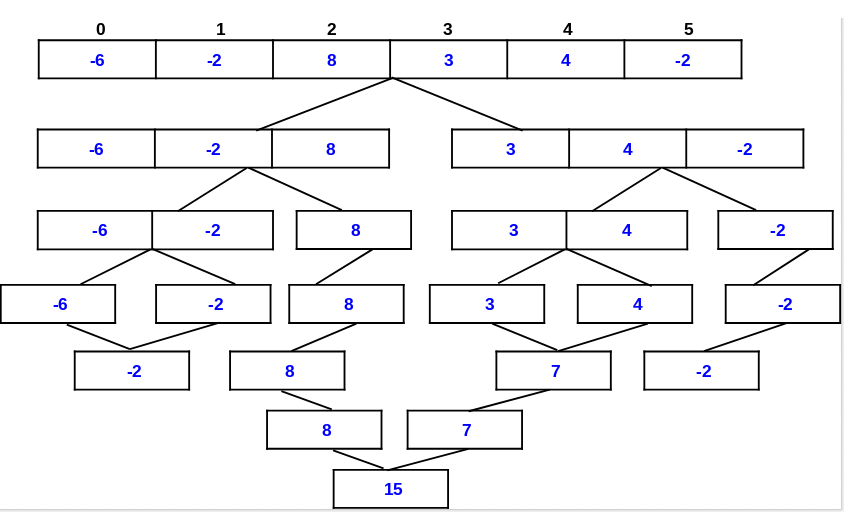

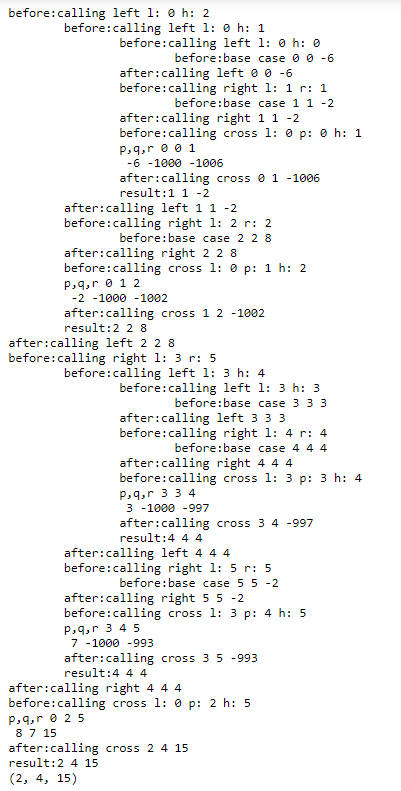

In [75]:
def mergesort_maxsubarray(a, l, h, level):
    
    if l == h:
        print(('\t' * (level)) + "before:", end="")
        print("base case", l, h, a[l])
        return (l, h, a[l])
    
    p = (h + l)//2
    
    print(('\t' * (level)) + "before:", end="")
    print("calling left", "l:", l, "h:", p)
    
    (left_low,  left_high,  left_sum)  = mergesort_maxsubarray(a, l, p, level+1)
    
    print(('\t' * (level)) + "after:", end="")
    print("calling left", left_low,  left_high,  left_sum)
    
    print(('\t' * (level)) + "before:", end="")
    print("calling right", "l:", p+1, "r:", h)
    
    (right_low, right_high, right_sum) = mergesort_maxsubarray(a, p+1, h, level+1)    
    
    print(('\t' * (level)) + "after:", end="")
    print("calling right", right_low, right_high, right_sum)
    
    print(('\t' * (level)) + "before:", end="")
    print("calling cross", "l:", l, "p:", p, "h:", h)
    
    (cross_low, cross_high, cross_sum) = mergesort_crosssum(a, l, p, h, level)
    
    print(('\t' * (level)) + "after:", end="")
    print("calling cross", cross_low, cross_high, cross_sum)
    
    
    if left_sum is not None:
        # Figure out the answer and return it
        if left_sum > right_sum and left_sum > cross_sum:
            print(('\t' * (level)) + "result:", end="")
            print(left_low, left_high, left_sum)
            
            return (left_low, left_high, left_sum)

    if right_sum is not None:
        if right_sum > left_sum and right_sum > cross_sum:
            print(('\t' * (level)) + "result:", end="")
            print(right_low, right_high, right_sum)
            
            return (right_low, right_high, right_sum)
    
    if cross_sum is not None:
        if cross_sum > left_sum and cross_sum > right_sum:
            print(('\t' * (level)) + "result:", end="")
            print(cross_low, cross_high, cross_sum)
            
            return (cross_low, cross_high, cross_sum)
    

def mergesort_crosssum(a, p, q, r, level):
    print(('\t' * (level)), end="")  
    print("p,q,r", p,q,r)
          
    left_sum = -1000
    right_sum = -1000    
    max_left = 0
    max_right = 0
    running_total = 0
    
    # Sum as we go back to find max sum
    for i in range(q, p-1, -1):
        
        running_total += a[i]
        if running_total > left_sum:
            left_sum = running_total
            max_left = i
       
    running_total = 0  
    max_right = q+1
    
    # Sum as we go forward to find max sum
    for i in range(q+1, r):
        running_total += a[i]
        if running_total > right_sum:
            right_sum = running_total
            max_right = i
    
    cross_sum = left_sum + right_sum
    
    print(('\t' * (level)), left_sum, right_sum, cross_sum)
    return (max_left, max_right, cross_sum)
    
#arr = [9,1,3, 2, 5, 7, 6]
#arr = [-2, -5, 6, -2, -3, 1, 5, -6]
arr = [-6,-2,8,3,4,-2]
print(mergesort_maxsubarray(arr, 0, len(arr)-1, 0))


before:calling left l: 0 h: 2
	before:calling left l: 0 h: 1
		before:calling left l: 0 h: 0
			before:base case 0 0 -6
		after:calling left 0 0 -6
		before:calling right l: 1 r: 1
			before:base case 1 1 -2
		after:calling right 1 1 -2
		before:calling cross l: 0 p: 0 h: 1
		p,q,r 0 0 1
		 -6 -1000 -1006
		after:calling cross 0 1 -1006
		result:1 1 -2
	after:calling left 1 1 -2
	before:calling right l: 2 r: 2
		before:base case 2 2 8
	after:calling right 2 2 8
	before:calling cross l: 0 p: 1 h: 2
	p,q,r 0 1 2
	 -2 -1000 -1002
	after:calling cross 1 2 -1002
	result:2 2 8
after:calling left 2 2 8
before:calling right l: 3 r: 5
	before:calling left l: 3 h: 4
		before:calling left l: 3 h: 3
			before:base case 3 3 3
		after:calling left 3 3 3
		before:calling right l: 4 r: 4
			before:base case 4 4 4
		after:calling right 4 4 4
		before:calling cross l: 3 p: 3 h: 4
		p,q,r 3 3 4
		 3 -1000 -997
		after:calling cross 3 4 -997
		result:4 4 4
	after:calling left 4 4 4
	before:calling right l

### Count Inversions

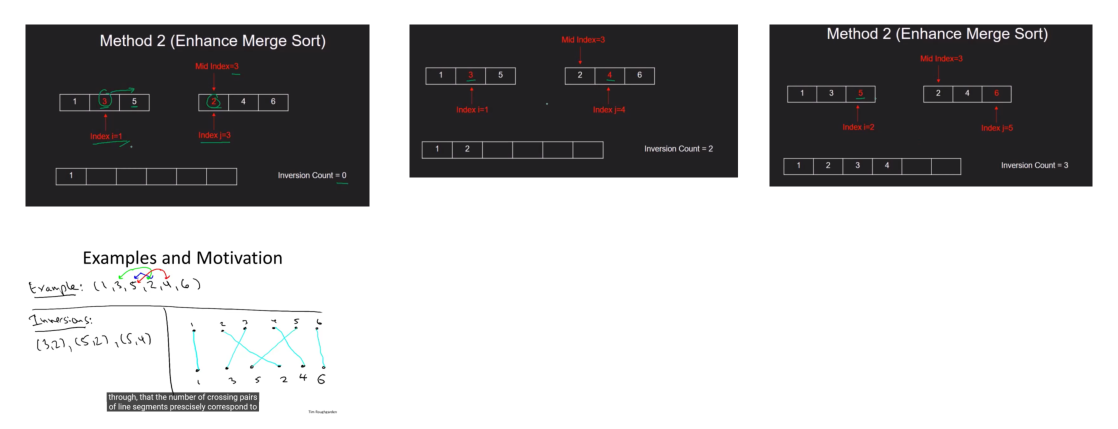

#### Count the number of crossing lines

In [104]:
def merge_count_inv(a, temp_a, l, h, level):
    
    inv_count = 0
    
    if l == h:        
        return 0
    
    m = (h + l)//2
        
    # Value from the LST
    left_count = merge_count_inv(a, temp_a, l, m, level+1)   
    
    # Value from the RST
    right_count = merge_count_inv(a, temp_a, m+1, h, level+1)
    
    # Value from this parent node - number of inversions made
    count_inversions = count_inv(a, temp_a, l, m, h, level)
        
    return left_count + right_count + count_inversions

def count_inv(a, temp_a, left, mid, right, level):
    i = left
    j = mid+1
    k = left
    inv_count = 0
    
    while i <= mid and j <= right:
        if a[i] <= a[j]:
            temp_a[k] = a[i]            
            i += 1
            k += 1
        else:
            # left side has higher values than jth element. 
            # for inv_count, count all number in the left array starting from i (mid-i + 1)
            temp_a[k] = a[j]
            j += 1
            k += 1
            inv_count += (mid-i + 1) 
           
    while i <= mid:
        temp_a[k] = a[i]
        i += 1
        k += 1
    
    while j <= right:
        temp_a[k] = a[j]
        j += 1
        k += 1
        
    # copy sorted array from temp to acutal array
    for loop_index in range(left, right+1):
        a[loop_index] = temp_a[loop_index]

    return inv_count
    
arr = [83, 20, 9, 50, 115, 61, 17]
temp_arr = [0] * len(arr)
print(merge_count_inv(arr, temp_arr, 0, len(arr)-1, 0))
print(arr)


11
[9, 17, 20, 50, 61, 83, 115]
